## Analyse eines Gamma-Strahlen Blitzes (GRB)
Gamma-Strahlen Blitze sind kosmische Ereignisse bei denen in sehr kurzer Zeit extreme Energiemengen in Form von Strahlung abgegeben werden. Die geschätzte Menge an Energie die bei einem GRB typischerweise ausgestoßen wird liegt bei $10^{44}$ J, was nach der Formel $E=mc^2$ einer Masse von fast 200 Erdmassen entspricht. Die Strahlung wird dabei entlang der Rotantionsachse in zwei sogenannte Jets gebündelt, wodurch GRBs für uns über sehr große Distanzen detektierbar sind (~ 120 Mio. Ly - 13 Mrd. Ly).   
Wir unterscheiden dabei zwei Arten von GRBs:


*   **Long GRBs**:  
Die Forschung geht heute davon aus, dass lange Gammablitze entstehen wenn sehr massereiche Sterne am Ende ihres Lebens explodieren. Dabei kommt es zum Graviationskollaps durch den ein sehr kompaktes Objekt wie ein Neutronen Stern oder ein schwarzes Loch entsteht mit einer Akkretionsscheibe.  
![long_grb.jfif](https://github.com/tunbehaun273/Fermi-Masterclass/raw/main/data/long_grb.jfif)(künstlerische Darstellung eines langen GRBs)

> Eigenschaften:
> * Dauer: >2s, typisch ~30s
> * 75% der GRBs sind lang
> * Über sehr große Distanzen messbar
> * Helles Nachglühen

*   **short GRBs**
Bei kurzen GRBs geht man davon aus, dass sie entstehen wenn ein System aus zwei kompakten Objekten -- zwei Neutronen Sterne oder Neutronen Stern und Schwarzes Loch -- verschmilzt. Die räumlich Ausdehnung dieses Systems ist deutlich kleiner verglichen mit der eines massereichen Sternes, weswegen auch der Blitz zeitlich kürzer sein kann.  
![short-grb.jpg](https://github.com/tunbehaun273/Fermi-Masterclass/raw/main/data/short-grb.jpg)(künstlerische Darstellung eines kurzen GRBs)
>Eigenschaften:
> * Dauer: <2s, typisch ~0.3s
> * weniger Energiereich als lange GRBs
> * selten und schwächeres Nachglühen





## Fermi-LAT Daten
Das Large-Area-Telescope des Fermi satelliten misst $\gamma$-rays zwischen 20 MeV und 300 GeV. Dabei werden für jedes Event u.a. die Zeit, die Energie und die Richtung bestimmt.  
Die Energie wird typischerweise in eV angegeben, wobei 1 eV der Energie entspricht, die eine Elementarladung $e$ erhält wenn sie eine Spannung von 1 V durchläuft. Der Faktor "M" oder "G" stehen dann für eine Million bzw. eine Milliarde eV.   
Die Richtung aus der ein $\gamma$ gekomment ist wird dabei in galaktischen Koordinaten angegeben, (Länge, Breite).  
![Koordinaten.png](https://github.com/tunbehaun273/Fermi-Masterclass/raw/main/data/Koordinaten.png) 

Jedem Punkt am Himmel werden werden zwei Winkel zugeordnet: 
* Die Länge (0° - 360°), die sagt in welcher Richtung in der Planetenebene sich der Punkt befindet   
* Die Breite (-90° - +90°), die sagt wie weit über oder unterhalb der Ebene der Punkt liegt  

In dieser Übung werden wir alle $\gamma$ die in einem gewissen Zeitraum gemessen wurden als Tabelle laden.

## Arbeiten mit dem Notebook
Das Notebook ist aus verschiedenen Zellen aufgebaut, mit Code der individuell ausgeführt werden kann. Dabei ist darauf zu achten, dass bestimmte Zellen Variablen brauchen, die von vorherigen Zellen in den Arbeitsspecher geladen wurden. Deswegen führt man generell die Zellen von oben nach unten der Reihe nach aus, kann aber auch die Werte in einer Zelle verändern und diese dann erneut ausführen.  
Das Ausführen einer Zelle funktioniert entweder mit `Shift`+`Enter` wenn sich der Kursor in der Zelle befindet oder per Mausklick auf das "Play"-Symbol oben links in der Zelle.  
Bereiche in Zellen in denen ihr Änderungen vornehmen sollt sind markiert mit: 


```
##############################
#######  <Tut etwas>  ########
#----------------------------#
ntbins = 1 ### Anzahl der Bins
tmin = 1 ### Startzeit
tmax = 1 ### Endzeit
#----------------------------#
##############################
```

Außerhalb der so markierten Bereiche müsste ihr nichts ändern, sondern nur die Zellen ausführen wie sie sind!  
In dieser Übung sollt ihr veruchen möglichst sinnvolle Werte für die Variablen zu finden und so folgende Fragen beantworten:

1.   **Die Position des GRB in galaktischen Koordinaten**  
  Alle $\gamma$ werden entsprechend ihrer rekonstruierten Position in eine Himmelsprojektion gefüllt.  
2.   **Die Startzeit und Dauer des GRB**  
  Alle $\gamma$ werden entsprechend der detektierten Zeit in ein Histogramm gefüllt.

Versucht dazu den entsprechenden Variablen, die die Histogramme karakterisieren, verschiedene Werte zu geben. Findet solche, die euch ein möglichst klares Bild von dem Ereignis geben und lest die gefragten Werte aus den Plots ab.

Bei Fragen wendet euch gerne an uns oder fragt Google 😉





Adapted by Aakash Bhat and Dmitry Malyshev from https://colab.research.google.com/drive/1-hyY4SoEoQJT9reDUX7WQ4S2J_fWxZhr

(Elisabetta Bissaldi, Francesco de Palma, Leonardo Di Venere and Fabio Gargano)

First we import the required libraries which shall help us read and plot our required data.


In [175]:
# import libraries
from astropy.table import Table
import numpy as np
import time, datetime
import matplotlib.pyplot as plt
from IPython.display import display, Image
from imageio import imread, mimsave

import warnings
warnings.simplefilter("ignore")

### need to upload files for 2 and 3
folder = 'https://raw.githubusercontent.com/tunbehaun273/Fermi-Masterclass/main/data_csv/'
links = {1: folder + 'GRB080916C_PH00.csv',
         2: folder + 'GRB090510_PH00.csv',
         3: folder + 'GRB131108A_PH00.csv',
         4: folder + 'GRB221009A_PH00.csv',
         5: folder + 'GRB090902B_PH00.csv',
        }

We first define a function which converts MET data which is in seconds to a date and time based on a reference time


In [176]:
# Definiere eine Funktion die von der "mission elapsed time" (MET) zu normalem Datum und Uhrzeit transformiert
met0 = datetime.datetime(2001,1,1,0,0,0) #reference time
def met2date(met_seconds):
  return met0 + datetime.timedelta(seconds=met_seconds)

#Current Time and Date:
now = datetime.datetime.now()
print ("Current time and date: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))
#in MET format (seconds from reference time) 
dsec=(now-met0).total_seconds()
print ("Current MET: ")
print(dsec)
#If we use the previous function with hourly METs, we obtain the current value again.
print ("Current date obtained with the function : ")
print (met2date(dsec))
print("As you can see, the current date and the date obtained by applying the function coincide.")

Current time and date: 
2023-04-07 08:33:57
Current MET: 
702549237.141099
Current date obtained with the function : 
2023-04-07 08:33:57.141099
As you can see, the current date and the date obtained by applying the function coincide.


In [177]:
# Daten einlesen
#############################################
########   wählt hier eure Daten   ##########
#-------------------------------------------#
datensatz = 4   # mögliche Datensätze [1,2,3]
#-------------------------------------------#
#############################################

filelink = links[datensatz]
table = Table.read(filelink, delimiter=',')
n_events = len(table)
print(f'Es wurden {n_events} Events eingelesen')
n_show = min(10, n_events)
table[:n_show].show_in_notebook()

Es wurden 271 Events eingelesen


idx,ENERGY,L,B,TIME
0,257.3912658691406,59.15455627441406,-0.9280463457107544,687013836.9553113
1,141.514404296875,50.95105743408203,-5.383166790008545,687014466.7348472
2,2306.249267578125,52.91278839111328,13.285743713378906,687013897.7800932
3,414.5868225097656,56.44350051879883,0.7925209999084473,687013739.0772711
4,114.68849182128906,57.59648895263672,-0.06252174824476242,687013809.5042789
5,248.63807678222656,53.16604232788086,4.446715831756592,687013849.0193864
6,467.12945556640625,54.56647491455078,-2.1091771125793457,687013893.3854029
7,909.9931030273438,52.15707015991211,-1.295578956604004,687013952.0767335
8,171.9801788330078,54.39683532714844,3.197810649871826,687013968.0731434
9,395.3078308105469,50.96470642089844,-0.8145848512649536,687013992.061912


In [178]:
times = table["TIME"]
glon = table["L"]
glat = table["B"]
print('Gesamte Zeitdauer: %i s' % (max(times) - min(times)))
print("Mittlere Länge = %.2f deg, Mittlere Breite = %.2f deg" % (np.mean(glon), np.mean(glat)))

Gesamte Zeitdauer: 1016 s
Mittlere Länge = 51.59 deg, Mittlere Breite = 3.77 deg


## Aufgabe 1: Bestimmung der Position in galaktischen Koordinaten
- Verändert die Werte für `glon_min` und `glon_max`, sowie `glat_min` und `glat_max` um den Ausschnitt der Himmelskarte zu verändern. Durch entsprechend gewählte Werte könnt ihr an die Position der Quelle heranzoomen. Die Werte von oben geben euch eine ungefähre Ahnung in welchem Bereich die Länge und Breite liegen sollte. (Achtet darauf dass der "min" Wert immer kleiner ist als der "max" Wert)
- Mit der Variablen `nxybins` könnt ihr die Auflösung der Karte bestimmen.


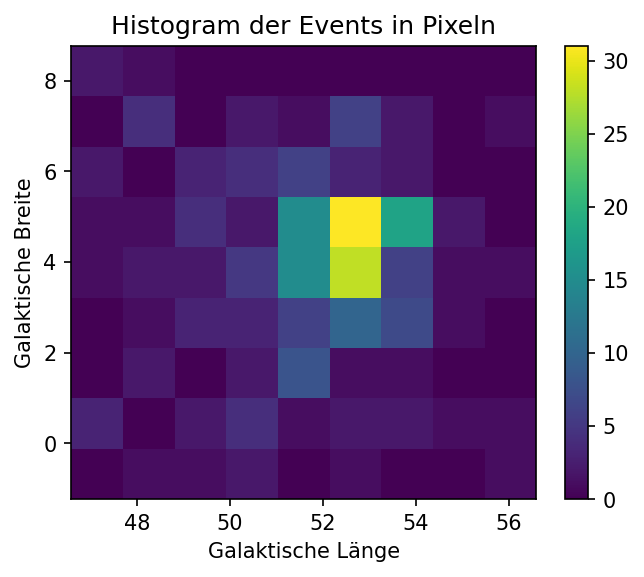

In [179]:
#####################################
#####   Ändert die Werte hier   #####
#-----------------------------------#
nxybins = 10  # Anzahl der Bins
glon_min = np.mean(glon) - 5.  # Minimum der Länge
glon_max = np.mean(glon) + 5.  # Maximum der Länge
glat_min = np.mean(glat) - 5. # Minimum der Breite
glat_max = np.mean(glat) + 5.   # Maximum der Breite
#-----------------------------------#
#####################################

# Definition der Histogrambins
glon_bins = np.linspace(glon_min, glon_max, nxybins)
glat_bins = np.linspace(glat_min, glat_max, nxybins)

# plot 2D histogram of counts of gamma-rays in pixels
fig, ax = plt.subplots(dpi=150,figsize=(5,4))
counts, xedges, yedges, im = ax.hist2d(glon, glat, bins=(glon_bins, glat_bins))
cbar = plt.colorbar(im, ax=ax)
plt.title("Histogram der Events in Pixeln");
plt.xlabel("Galaktische Länge");
plt.ylabel("Galaktische Breite");

## Aufgabe 1: Antwort
(ersetzt X und Y mit eurer Antwort wenn ihr zufrieden seid)
- Länge des GRB = X
- Breite des GRB = Y

## Aufgabe 2: Bestimmt Start und Dauer des GRB
Dazu verschieben wir die Event Zeiten, die in MET gegeben sind so, dass das erste Event bei T=0 liegt.
- Verändert `tmin` und `tmax` um das Zeitfenster zu wählen welches gezeigt wird. 

- Verändert die Variable `ntbins` um die Auflösung des Histograms zu optimieren.

Text(0, 0.5, 'Number of photons')

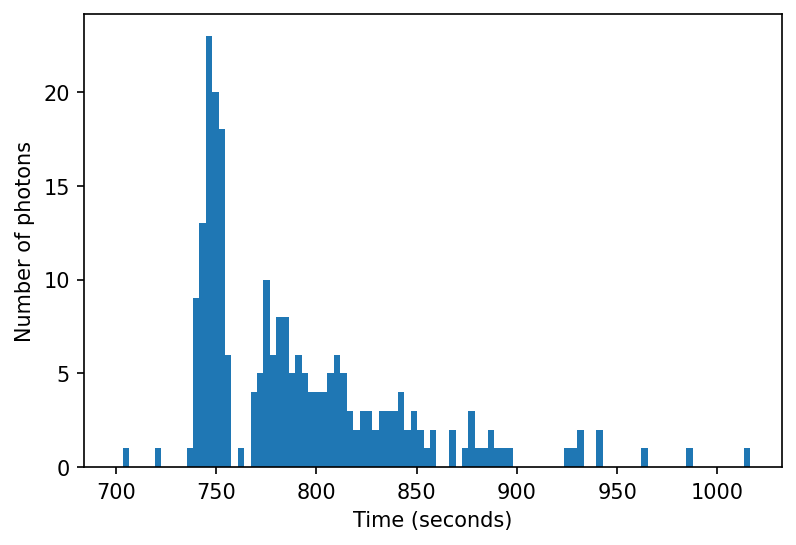

In [191]:
# Verschieben der MET Zeiten, sodass die Zeit des erten Events bei 0 ist
tmin0 = min(times)
tmax0 = max(times)
delta_times = times - tmin0

#############################################
#########   Ändert die Werte hier   ########
#-------------------------------------------#
ntbins = 100 ### Anzahl der Bins
tmin = 700 ### Startzeit (in verschobener MET)
tmax = tmax0 - tmin0 ### Endzeit (in verschobener MET)
#-------------------------------------------#
#############################################



tbins = np.linspace(tmin, tmax, ntbins)

plt.figure(dpi=150)
hist_data = plt.hist(delta_times, bins=tbins)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of photons')

In [181]:
tmax0

687014740.6291317

## Aufgabe 2: Antwort


In [182]:
##############################################################
# Tragt hier eure gefundene Startzeit und Dauer des GRB ein  #
#------------------------------------------------------------#
t_start = 0.0  # (in verschobener MET)
dauer = 0.0    # (in Sekunden)
#------------------------------------------------------------#
##############################################################

# Transformiere zurück zu MET Zeit und dann zu Datum und Uhrzeit
t_begin_MET = tmin0 + t_start
date_time = met2date(t_begin_MET)
print('GRB Start (MET) = %.1f' % t_begin_MET)
print('GRB Start = %s' % date_time)
print('GRB Dauer: %s s' % dauer)


GRB Start (MET) = 687013724.2
GRB Start = 2022-10-09 13:08:44.182147
GRB Dauer: 0.0 s


## Bonus: 
Visualisierung des Ausbruches als GIF.  
Wer es sich zutraut darf auch hier gerne mit verschiedenen Werten experementieren.

In [183]:
n_map = 8  # Anzahl der Bilder, nicht über 100 wählen!
t1 = 0      # Start des GIF in verschobener MET
t2 = tmax   # Ende des GIF in verschobener MET
dt_map = (t1 - t2) / n_map
tbins_map = np.linspace(t1, t2, n_map + 1)

delta_xy = 4.  # Größe der Himmelskarte in Grad
xmin = np.mean(glon) - delta_xy / 2.
xmax = np.mean(glon) + delta_xy / 2.
ymin = np.mean(glat) - delta_xy / 2.
ymax = np.mean(glat) + delta_xy / 2.

n_xy = 30
xbins = np.linspace(xmin, xmax, n_xy)
ybins = np.linspace(ymin, ymax, n_xy)

# select max value
max_array = []
for i in range(len(tbins_map)-1):
    tmask = (delta_times > tbins_map[i]) & (delta_times < tbins_map[i+1])  
    glon_imap = glon[tmask]
    glat_imap = glat[tmask] 
    counts, xedges, yedges, im = ax.hist2d(glon_imap, glat_imap, bins=(xbins, ybins))
    max_array.append(np.max(counts))
max_val = max(max_array)
print(max_val)


3.0


In [184]:
pngs = []

for i in range(len(tbins_map)-1):
    tmask = (delta_times > tbins_map[i]) & (delta_times < tbins_map[i+1])  
    glon_imap = glon[tmask]
    glat_imap = glat[tmask]
    fig, ax = plt.subplots(dpi=150,figsize=(5,4))
    counts, xedges, yedges, im = ax.hist2d(glon_imap, glat_imap, 
                                           bins=(xbins, ybins), 
                                           vmin=0, vmax=max_val);
    cbar = plt.colorbar(im, ax=ax)
    plt.title("Counts in pixels from %i to %i sec" % (tbins_map[i], tbins_map[i+1]))
    #plt.title(i)
    plt.xlabel("Galaktische Länge");
    plt.ylabel("Galaktische Breite");
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    filename = 'temp_image_%i.png' % i
    fig.savefig(filename, bbox_inches='tight')
    plt.clf(); # clear figure
    pngs.append(filename)

images = []
for png in pngs:
    img = imread(png)
    images.append(img)
mimsave('temp.gif', images, fps=2)



<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

<Figure size 750x600 with 0 Axes>

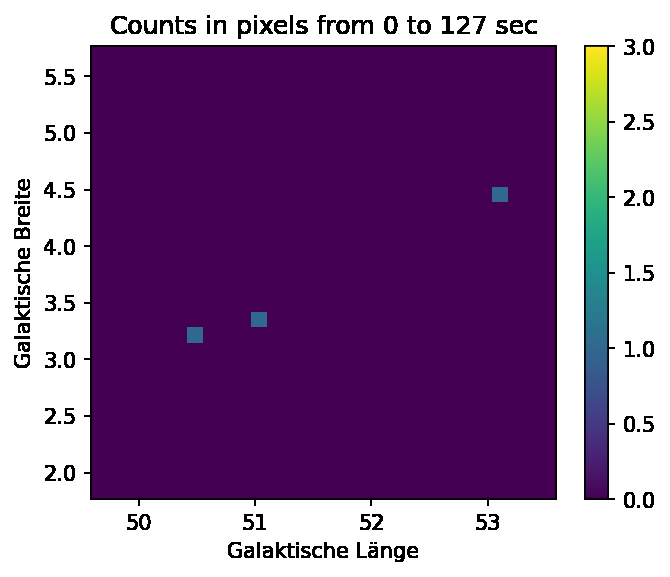

In [185]:
with open('temp.gif','rb') as f:
    im = Image(data=f.read(), format='png');
    display(im)

In [186]:
import os
for fn in os.listdir('.'):
    if fn.startswith('temp'):
        os.remove(fn)


In [187]:
os.listdir('.')

['FermiMasterclass_FAU_GRB-analysis.ipynb',
 'fits2csv.ipynb',
 '.ipynb_checkpoints',
 'FermiMasterclass_FAU_GRB-analysis_test.ipynb']